In [1]:
import numpy as np
import time
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from evolution import run_evolution
from utils.plot_utils import matrix_plot, plot_all_workers, plot_requirements_matrix
from utils.read_and_write_constraints import retrieve_names_from_excel
# from utils.fitness_functions import fitness_requirements_are_satisfied, fitness_respect_availability
# from utils.population_creation import Individual

* **Population creation**

| Option | Description                                                  | Initial population                                    | Crossover effect (no mutation)                               |
| ------ | ------------------------------------------------------------ | ----------------------------------------------------- | ------------------------------------------------------------ |
| 1      | For each shift, assign to workers randomly                   | Different individuals                                 | Generates new offspring (shift work force remains invariant but worker load changes) |
| 2      | For each shift, assign workers from least availablility to most | Single individual                                     | Generates identical offspring                                |
| 3      | like Option 2 but stochastically when two workers have the same availability | Different individuals |                                                              |


* **Crossover**:
    - [x] work force per shift invariance
    
    - [x] work load per worker changes



* **Mutation**

| Type      | Combined alone with crossover                                |
| --------- | ------------------------------------------------------------ |
| Exchange  | has no effect on work load and work force invariance         |
| Volunteer | work force remains invariant but work load may surpass availability |
|           |                                                              |

**Possible combinations**

Option 1 combinations
* _Option 1 + no mutation_: work load seems not to surpass maximum
* _Option 1 + Type Exchange_: work load seems not to surpass maximum
* _Option 1 + Type Volunteer_: work load may surpass availability
* _Option 1 + Type Exchange + Volunteer_: work load may surpass availability

Option 2 combinations
* _Option 2 + Type Exchange_: can't find exchange --> all generations are the same
* _Option 2 + Type Volunteer_: work load may surpass availability
* _Option 2 + Type Exchange + Volunteer_: work load may surpass availability



#### Other parameters

* `find_workers_that_could_volunteer`: `min_threshold`
* `find_spots_to_volunteer_for`: only account for lunch break

In [2]:
start_time = time.time()
final_population, problem_parameters = run_evolution(population_size=20,
                                                     amount_iterations=100,
                                                     mutation_rate=0.01);
print(f"Time elapsed: {time.time() - start_time} seconds")

iteration 0   average fitness: 0.9231119696748801    max fitness: 0.9231119696748799

iteration 1   average fitness: 0.9269563711911359    max fitness: 1.0

iteration 2   average fitness: 0.9231119696748801    max fitness: 0.9231119696748799

iteration 3   average fitness: 0.9231119696748801    max fitness: 0.9231119696748799

iteration 4   average fitness: 0.9231119696748801    max fitness: 0.9231119696748799

iteration 5   average fitness: 0.9231119696748801    max fitness: 0.9231119696748799

iteration 6   average fitness: 0.9231119696748801    max fitness: 0.9231119696748799

iteration 7   average fitness: 0.9231119696748801    max fitness: 0.9231119696748799

iteration 8   average fitness: 0.9231119696748801    max fitness: 0.9231119696748799

iteration 9   average fitness: 0.9231119696748801    max fitness: 0.9231119696748799

iteration 10   average fitness: 0.9269563711911359    max fitness: 1.0

iteration 11   average fitness: 0.9308007727073919    max fitness: 1.0

iteration 1

In [3]:
amount_workers, amount_shifts, availability_matrix, requirements_matrix = problem_parameters
amount_activities, _ = requirements_matrix.shape
worker_names, shift_names, activity_names = retrieve_names_from_excel()
best_individual, best_score = final_population.fittest_individual()
print("Score = ",best_score)

Score =  0.9231119696748799


Some individuals might be impossible solutions

array([], dtype=int64)

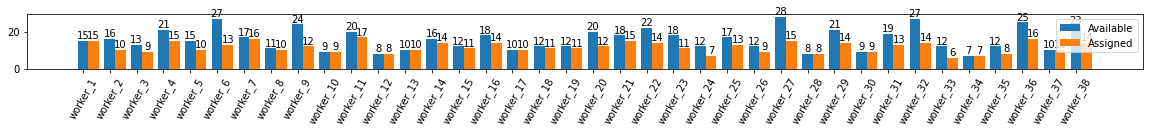

In [4]:
aa1 = final_population.population_individuals[1]
aaa1 = aa1.morphology

fig = plt.figure(figsize=(20,1))
ax = fig.add_subplot(111)
# Availability
ax.bar(np.arange(amount_workers),availability_matrix.sum(axis=1),  width = 0.4)
ax.bar_label(ax.containers[0], label_type='edge');
# Assigned
ax.bar(np.arange(amount_workers)+0.4,aaa1.sum(axis=1), width = 0.4)
ax.bar_label(ax.containers[1], label_type='edge');

ax.legend(labels=['Available', 'Assigned'], loc="upper right");
ax.set_xticks(range(amount_workers), [f"worker_{i}" for i in range(1, amount_workers + 1)], rotation=60);

np.where((availability_matrix.sum(axis=1) - aaa1.sum(axis=1)) < 0)[0]

In [5]:
for kkk in range(len(final_population)):
    aa_i = final_population.population_individuals[kkk].morphology
    if len(np.where((availability_matrix.sum(axis=1) - aa_i.sum(axis=1)) < 0)[0]) > 0:
        print(kkk)
        

# Requirements visualization

## Availability matrix

In [6]:
anonimize = False

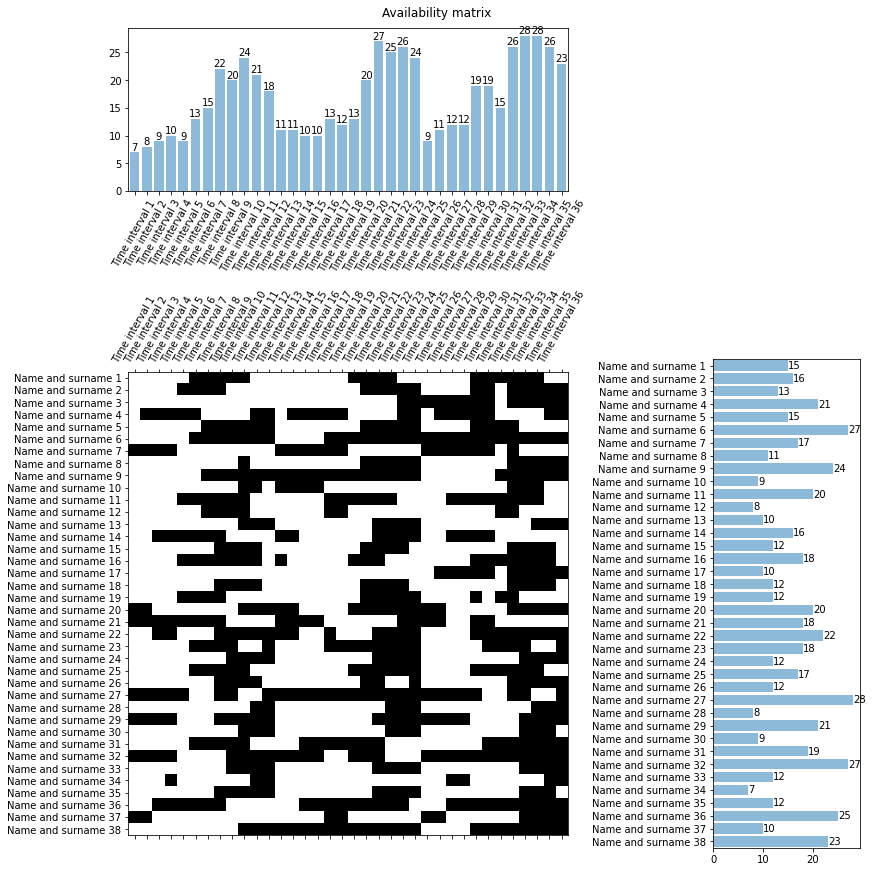

In [7]:
fig = plt.figure(figsize=(12,12), constrained_layout=True)

gs = GridSpec(4, 4, figure=fig)

# ax1 = fig.add_subplot(gs[3])
# ax1.get_xaxis().set_visible(False)
# ax1.get_yaxis().set_visible(False)

ax4 = fig.add_subplot(gs[1:, 0:-1])
ax4.spy(availability_matrix)
if anonimize:
    ax4.set_xticks(range(amount_shifts), [f"shift_{i}" for i in range(1, amount_shifts + 1)], rotation=60)
    ax4.set_yticks(range(amount_workers), [f"worker_{i}" for i in range(1, amount_workers + 1)]);
else:
    ax4.set_xticks(range(amount_shifts), shift_names, rotation=60)
    ax4.set_yticks(range(amount_workers), worker_names);

ax2 = fig.add_subplot(gs[0,:3], sharex=ax4)
ax2.bar(np.arange(amount_shifts),availability_matrix.sum(axis=0), alpha=0.5)
ax2.bar_label(ax2.containers[0], label_type='edge');
if anonimize:
    ax2.set_xticks(range(amount_shifts), [f"shift_{i}" for i in range(1, amount_shifts + 1)], rotation=60)
else:
    ax2.set_xticks(range(amount_shifts), shift_names, rotation=60)
# ax2.get_xaxis().set_visible(False)

ax3 = fig.add_subplot(gs[1:, -1], sharey=ax4)
ax3.barh(np.arange(amount_workers),availability_matrix.sum(axis=1), alpha=0.5)
ax3.bar_label(ax3.containers[0], label_type='edge');
if anonimize:
    ax3.set_yticks(range(amount_workers), [f"worker_{i}" for i in range(1, amount_workers + 1)]);
else:
    ax3.set_yticks(range(amount_workers), worker_names);
# ax3.get_yaxis().set_visible(False)

fig.suptitle("Availability matrix");

## Requirements

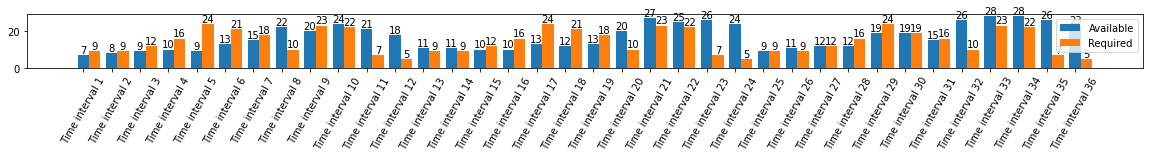

In [8]:
fig = plt.figure(figsize=(20,1))
ax = fig.add_subplot(111)
# Availability
ax.bar(np.arange(amount_shifts),availability_matrix.sum(axis=0),  width = 0.4)
ax.bar_label(ax.containers[0], label_type='edge');
# Requirements
ax.bar(np.arange(amount_shifts)+0.4,requirements_matrix.sum(axis=0), width = 0.4)
ax.bar_label(ax.containers[1], label_type='edge');

ax.legend(labels=['Available', 'Required'], loc="upper right");
if anonimize:
    ax.set_xticks(range(amount_shifts), [f"shift_{i}" for i in range(1, amount_shifts + 1)], rotation=60);
else:
    ax.set_xticks(range(amount_shifts), shift_names, rotation=60);

# Solution matrix

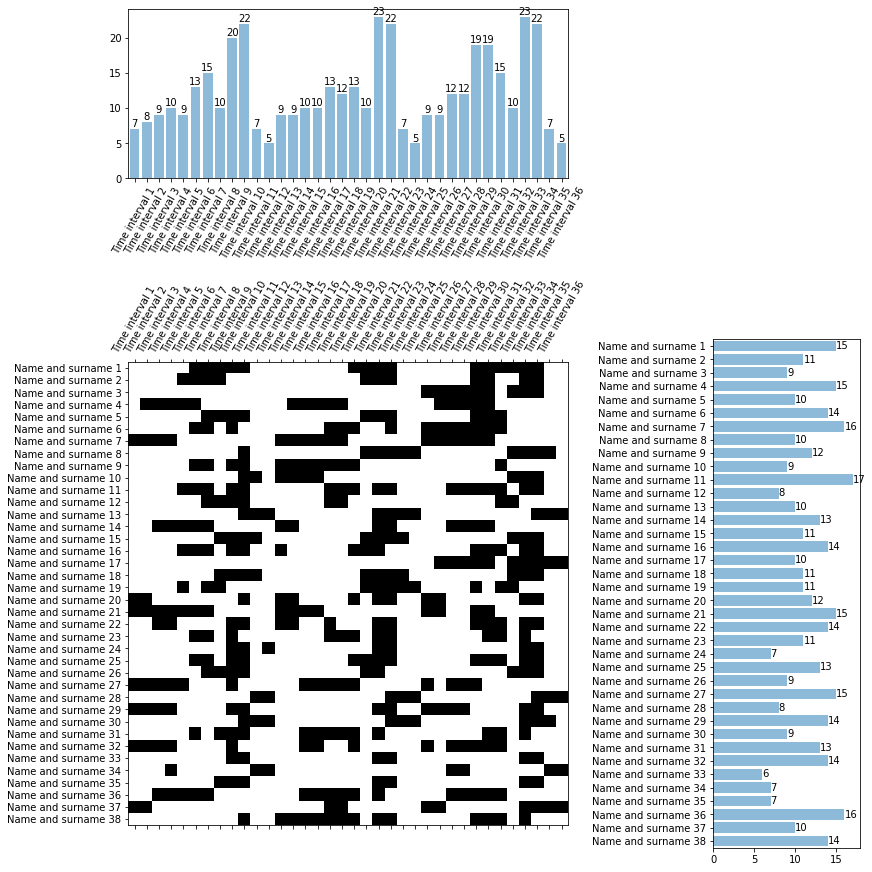

In [9]:
best_mat = best_individual.morphology

fig = plt.figure(figsize=(12,12), constrained_layout=True)
gs = GridSpec(4, 4, figure=fig)

ax4 = fig.add_subplot(gs[1:, 0:-1])
ax4.spy(best_mat)
if anonimize:
    ax4.set_xticks(range(amount_shifts), [f"shift_{i}" for i in range(1, amount_shifts + 1)], rotation=60)
    ax4.set_yticks(range(amount_workers), [f"worker_{i}" for i in range(1, amount_workers + 1)]);
else:
    ax4.set_xticks(range(amount_shifts), shift_names, rotation=60)
    ax4.set_yticks(range(amount_workers), worker_names);

ax2 = fig.add_subplot(gs[0,:3], sharex=ax4)
ax2.bar(np.arange(amount_shifts),best_mat.sum(axis=0), alpha=0.5)
ax2.bar_label(ax2.containers[0], label_type='edge');
if anonimize:
    ax2.set_xticks(range(amount_shifts), [f"shift_{i}" for i in range(1, amount_shifts + 1)], rotation=60)
else:
    ax2.set_xticks(range(amount_shifts), shift_names, rotation=60)
# ax2.get_xaxis().set_visible(False)

ax3 = fig.add_subplot(gs[1:, -1], sharey=ax4)
ax3.barh(np.arange(amount_workers),best_mat.sum(axis=1), alpha=0.5)
ax3.bar_label(ax3.containers[0], label_type='edge');
if anonimize:
    ax3.set_yticks(range(amount_workers), [f"worker_{i}" for i in range(1, amount_workers + 1)]);
else:
    ax3.set_yticks(range(amount_workers), worker_names);

## Missing workers

At least, these will be missing

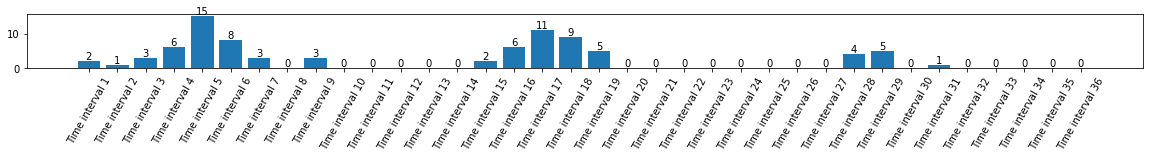

In [10]:
fig = plt.figure(figsize=(20,1))
ax = fig.add_subplot(111)
# Availability
ax.bar(np.arange(amount_shifts),[max(0,i) for i in list(requirements_matrix.sum(axis=0) - availability_matrix.sum(axis=0))])
ax.bar_label(ax.containers[0], label_type='edge');

if anonimize:
    ax.set_xticks(range(amount_shifts), [f"shift_{i}" for i in range(1, amount_shifts + 1)], rotation=60);
else:
    ax.set_xticks(range(amount_shifts), shift_names, rotation=60);

Acctually missing

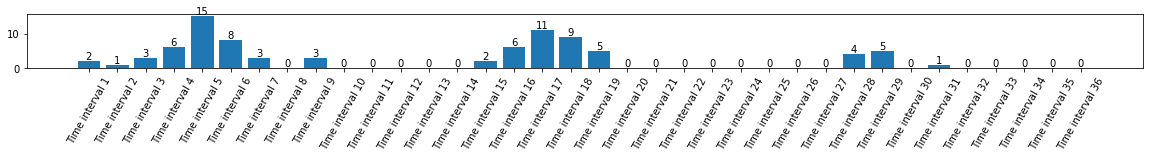

In [11]:
fig = plt.figure(figsize=(20,1))
ax = fig.add_subplot(111)
# Acctually missing
ax.bar(np.arange(amount_shifts),[max(0,i) for i in list(requirements_matrix.sum(axis=0) - best_mat.sum(axis=0))])
ax.bar_label(ax.containers[0], label_type='edge');

if anonimize:
    ax.set_xticks(range(amount_shifts), [f"shift_{i}" for i in range(1, amount_shifts + 1)], rotation=60);
else:
    ax.set_xticks(range(amount_shifts), shift_names, rotation=60);

## All shifts 

Free shifts

In [12]:
# fig = plt.subplots(figsize=(20, 20))
# plt.spy(
#     np.vstack(
#         (best_mat[5], np.multiply(availability_matrix,1-best_mat))
#     )
# )
# best_mat = out_2

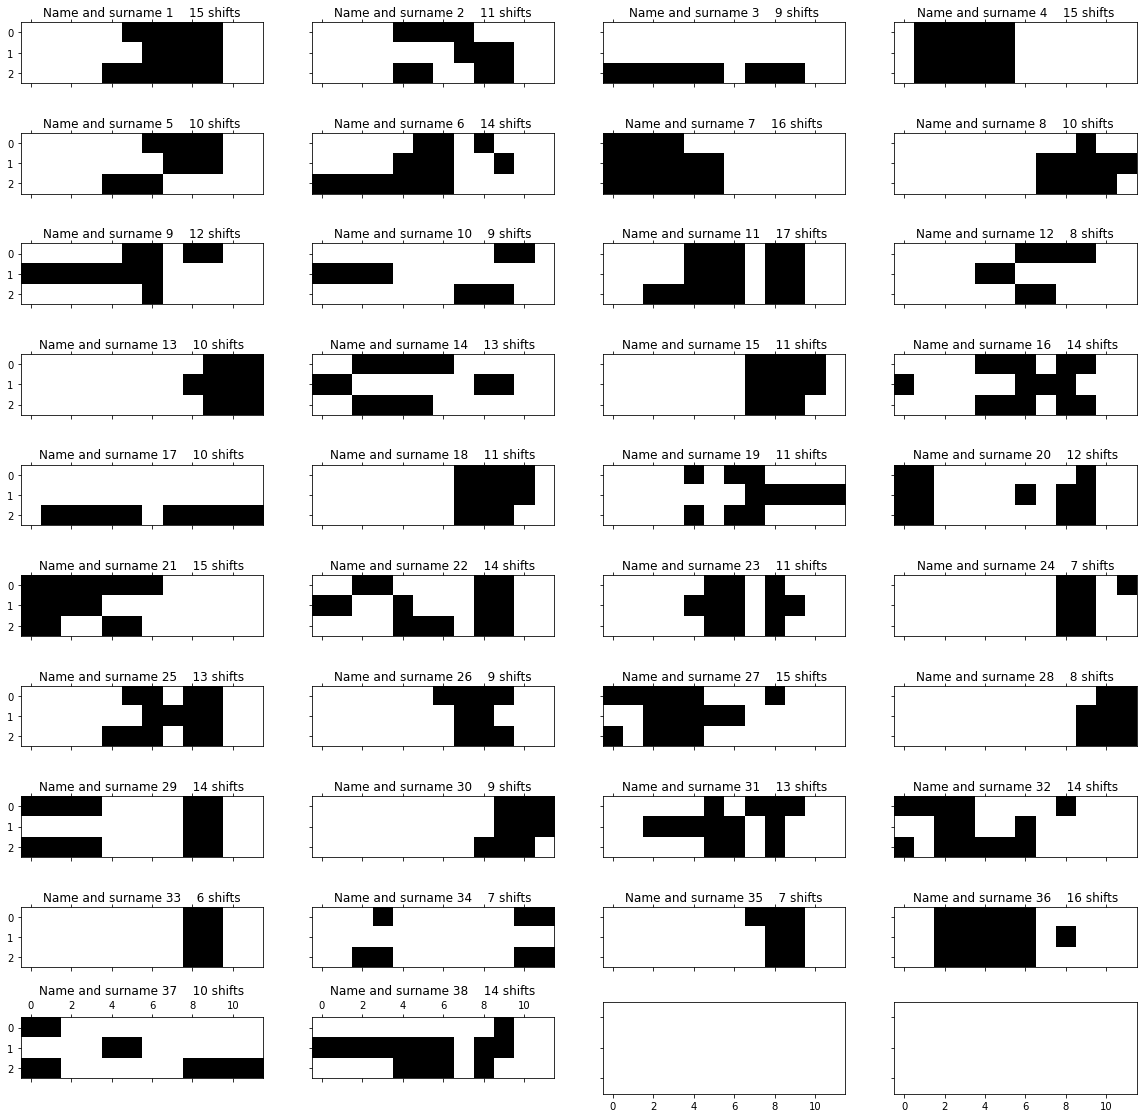

In [ ]:
n_rows = 10
n_columns = amount_workers // n_rows + 1

fig, axes = plt.subplots(figsize=(20, 20), sharex=True, sharey=True, ncols=n_columns, nrows=n_rows)

for i in range(amount_workers):
    row_i = i // n_columns
    column_i = i % n_columns
    vect_franja = best_mat[i]
    axes[row_i, column_i].spy(vect_franja.reshape(3,12))
    # axes[row_i, column_i].spy(np.vstack((vect_franja,np.ones(amount_shifts)*vect_franja)))
    if anonimize:
        axes[row_i, column_i].set_title(f"worker_{i+1}    {int(vect_franja.sum())} shifts")
    else:
        axes[row_i, column_i].set_title(f"{worker_names[i]}    {int(vect_franja.sum())} shifts")

## % occupation each worker

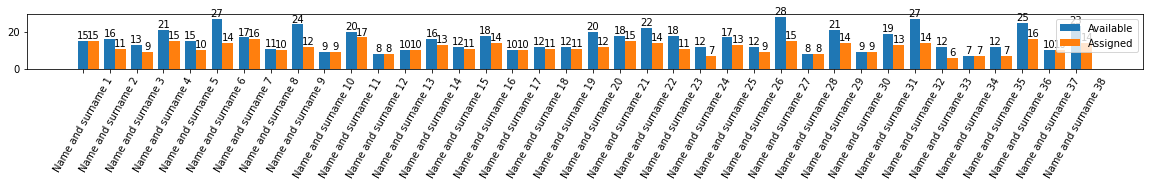

In [ ]:
fig = plt.figure(figsize=(20,1))
ax = fig.add_subplot(111)
# Availability
ax.bar(np.arange(amount_workers),availability_matrix.sum(axis=1),  width = 0.4)
ax.bar_label(ax.containers[0], label_type='edge');
# Assigned
ax.bar(np.arange(amount_workers)+0.4,best_mat.sum(axis=1), width = 0.4)
ax.bar_label(ax.containers[1], label_type='edge');

ax.legend(labels=['Available', 'Assigned'], loc="upper right");
if anonimize:
    ax.set_xticks(range(amount_workers), [f"worker_{i}" for i in range(1, amount_workers + 1)], rotation=60);
else:
    ax.set_xticks(range(amount_workers), worker_names, rotation=60);

In [ ]:
from utils.mutation_functions import find_spots_to_volunteer_for, mutation_volunteer

In [ ]:
find_spots_to_volunteer_for(best_mat, problem_parameters)

[(0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (7, 9),
 (8, 30),
 (37, 9)]

**Generate solution matrix**

In [ ]:
chosen_solution = best_individual.morphology

In [68]:
min_found = 9999

for _ in range(1000):
    solution_matrix = np.zeros((amount_workers, amount_activities, amount_shifts))

    # Access shifts and activities in a random order
    randomly_ordered_shifts = np.arange(amount_shifts)
    np.random.shuffle(randomly_ordered_shifts)

    randomly_ordered_activities = np.arange(amount_activities)
    np.random.shuffle(randomly_ordered_activities)

    for shift_i in randomly_ordered_shifts:
        available_workers = chosen_solution[:, shift_i].astype(int)
        amount_available_workers = int(available_workers.sum())
        for activity_i in randomly_ordered_activities:
            # print(f"\nshift = {shift_i} activity = {activity_i}")
            amount_required_workers = int(requirements_matrix[activity_i, shift_i])
            # print(f"{amount_required_workers} required and {amount_available_workers}  available")
            if amount_available_workers > 0:
                for i in range(min(amount_required_workers, amount_available_workers)):
                    # print(f"choose from: {available_workers}")
                    index_free_workers = np.where(available_workers > 0.5)[0]
                    # print(f"indexs available: {index_free_workers}")
                    new_worker_index = np.random.choice(index_free_workers)
                    # print(f"{new_worker_index} was selected")

                    solution_matrix[new_worker_index, activity_i, shift_i] = 1

                    available_workers[new_worker_index] = 0
                    amount_available_workers = int(available_workers.sum())
    
    aa = fitness_solution_matrix()
    # print(aa)
    if aa < min_found:
        min_found = aa
min_found

1.4210526315789473

In [ ]:
solution_matrix = np.zeros((amount_workers, amount_activities, amount_shifts))

# Access shifts and activities in a random order
randomly_ordered_shifts = np.arange(amount_shifts)
np.random.shuffle(randomly_ordered_shifts)

randomly_ordered_activities = np.arange(amount_activities)
np.random.shuffle(randomly_ordered_activities)

for shift_i in randomly_ordered_shifts:
    available_workers = chosen_solution[:, shift_i].astype(int)
    amount_available_workers = int(available_workers.sum())
    for activity_i in randomly_ordered_activities:
        print(f"\nshift = {shift_i} activity = {activity_i}")
        amount_required_workers = int(requirements_matrix[activity_i, shift_i])
        print(f"{amount_required_workers} required and {amount_available_workers}  available")
        if amount_available_workers > 0:
            for i in range(min(amount_required_workers, amount_available_workers)):
                print(f"choose from: {available_workers}")
                index_free_workers = np.where(available_workers > 0.5)[0]
                print(f"indexs available: {index_free_workers}")
                new_worker_index = np.random.choice(index_free_workers)
                print(f"{new_worker_index} was selected")

                solution_matrix[new_worker_index, activity_i, shift_i] = 1

                available_workers[new_worker_index] = 0
                amount_available_workers = int(available_workers.sum())


shift = 29 activity = 0
0 required and 19  available

shift = 29 activity = 6
8 required and 19  available
choose from: [1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0
 1]
indexs available: [ 0  1  2  3  4  5  6 10 13 15 16 20 21 22 24 30 31 35 37]
35 was selected
choose from: [1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0
 1]
indexs available: [ 0  1  2  3  4  5  6 10 13 15 16 20 21 22 24 30 31 37]
5 was selected
choose from: [1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0
 1]
indexs available: [ 0  1  2  3  4  6 10 13 15 16 20 21 22 24 30 31 37]
2 was selected
choose from: [1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0
 1]
indexs available: [ 0  1  3  4  6 10 13 15 16 20 21 22 24 30 31 37]
16 was selected
choose from: [1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0
 1]
indexs available: [ 0  1  3  4  6 10 13 15 20 21 22 24 30 31 37]
21 was selected

In [67]:
def fitness_solution_matrix():
    repeated_activity_counter = 0
    for worker_i in range(amount_workers):
        # print(f"\nWorker {worker_i}")
        assignments = []
        # previous_is_assigned = False
        # previous_assignment = 0
        for shift_i in range(amount_shifts):
            # print(f"Shift {shift_i}")
            assigned_activity_vector = solution_matrix[worker_i,:,shift_i]
            if assigned_activity_vector.sum() > 0.5:
                assigned_activity = int(np.where(assigned_activity_vector > 0.5)[0])
                assignments.append(assigned_activity)
        count_repeated = 0
        # print("assignments =",assignments," len()=",len(assignments))
        for i in range(len(assignments) - 1):
            if assignments[i] == assignments[i+1]:
                count_repeated += 1
        # print("count_repeated =",count_repeated)
        
        repeated_activity_counter += count_repeated

    return repeated_activity_counter/amount_workers
fitness_solution_matrix()

2.1052631578947367

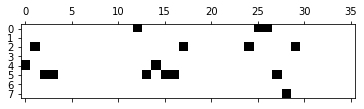

In [79]:
plt.spy(solution_matrix[6])

In [ ]:
# plt.spy(solution_matrix[16].sum(axis=0).reshape(3,12))

**Generate excel**

In [ ]:
writer = pd.ExcelWriter("schedule.xlsx")
for worker_i in range(amount_workers):
    worker_i_schedule = pd.DataFrame(solution_matrix[worker_i], columns=shift_names, index=activity_names, dtype=int)
    worker_i_schedule.to_excel(writer, sheet_name=(f"worker_{worker_i+1}" if anonimize else worker_names[worker_i]))
writer.save()

In [ ]:
out_1 = mutation_volunteer(best_mat,problem_parameters)

In [ ]:
find_spots_to_volunteer_for(out_1, problem_parameters)

[(0, 28), (0, 29), (0, 30), (0, 31), (7, 9), (8, 30), (37, 9)]

In [ ]:
out_2 = mutation_volunteer(out_1,problem_parameters)

In [ ]:
find_spots_to_volunteer_for(out_2, problem_parameters)

[(7, 9), (8, 30), (37, 9)]

In [ ]:
def assign_activities(input_morphology):
    output_morphology = np.zeros...)
    for shift_i in range(amount_shifts):
        requirements_vector = requirements_matrix[:, shift_i].copy()
        assigned_workers = input_morphology[:, shift_i].copy()
        
        new_activity_worker = np.zeros(current_distribution.shape)
        
        for _ in range(requirements_vector.sum()):
            # Choose activity
            index_pending_activity = np.where(requirements_vector > 0.5)[0]  # [0 1 3 4]
            chosen_activity = np.random.choice(index_pending_activity)
            requirements_vector[chosen_activity] -= 1

            # Choose worker
            index_available_workers = np.where(assigned_workers > 0.5)[0]  # [0 1 3 4]
            chosen_worker = np.random.choice(index_available_workers)
            assigned_workers[chosen_worker] = 0
            
            new_activity_worker[chosen_worker, chosen_activity] = 1
        
        output_morphology[:,:,shift_i] = new_activity_worker

SyntaxError: invalid syntax (4174725198.py, line 2)

In [49]:
# def retrieve_constraints_from_excel():
    
#     # Load requirements.xlsx
#     requirements_data = pd.read_excel("utils/constraints_files/requirements.xlsx",
#                                       index_col=0)
#     # shift_names = list(requirements_data.columns)
#     # activity_names = list(data.index)
    
#     # Load availability.xlsx
#     availability_data = pd.read_excel("utils/constraints_files/availability.xlsx",
#                                       index_col=0)
#     # worker_names = list(availability_data.index)
    
#     # Parameters to return
#     requirements_matrix = np.array(requirements_data).astype(int)
#     availability_matrix = np.array(availability_data).astype(int)
#     amount_workers, amount_shifts = availability_matrix.shape
    
#     return amount_workers, amount_shifts, availability_matrix, requirements_matrix

# Testing

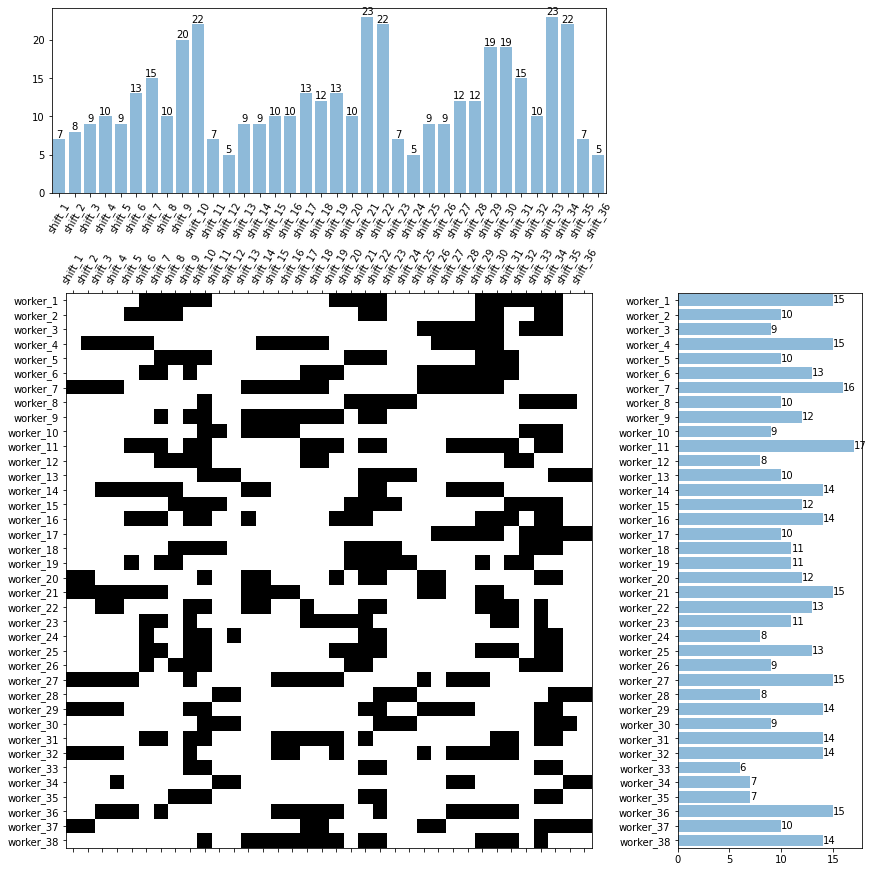

In [18]:
best_mat = best_individual.morphology

fig = plt.figure(figsize=(12,12), constrained_layout=True)
gs = GridSpec(4, 4, figure=fig)

ax4 = fig.add_subplot(gs[1:, 0:-1])
ax4.spy(best_mat)
ax4.set_xticks(range(amount_shifts), [f"shift_{i}" for i in range(1, amount_shifts + 1)], rotation=60)
ax4.set_yticks(range(amount_workers), [f"worker_{i}" for i in range(1, amount_workers + 1)]);

ax2 = fig.add_subplot(gs[0,:3], sharex=ax4)
ax2.bar(np.arange(amount_shifts),best_mat.sum(axis=0), alpha=0.5)
ax2.bar_label(ax2.containers[0], label_type='edge');
ax2.set_xticks(range(amount_shifts), [f"shift_{i}" for i in range(1, amount_shifts + 1)], rotation=60)
# ax2.get_xaxis().set_visible(False)

ax3 = fig.add_subplot(gs[1:, -1], sharey=ax4)
ax3.barh(np.arange(amount_workers),best_mat.sum(axis=1), alpha=0.5)
ax3.bar_label(ax3.containers[0], label_type='edge');
ax3.set_yticks(range(amount_workers), [f"worker_{i}" for i in range(1, amount_workers + 1)]);

In [19]:
from utils.mutation_functions import mutation_volunteer, mutation_exchange_shifts

In [31]:
startint_best = np.array(best_mat)

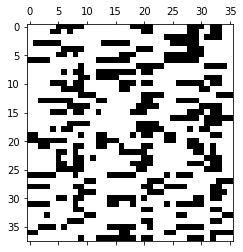

In [32]:
plt.spy(startint_best)

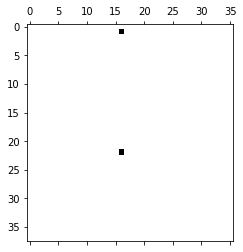

In [35]:
plt.spy(startint_best - aa)

In [33]:
aa = mutation_volunteer(best_mat,problem_parameters)

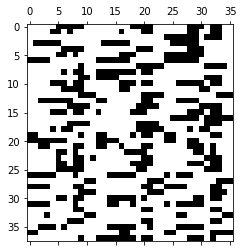

In [34]:
plt.spy(aa)

In [28]:
# bb = mutation_exchange_shifts(best_mat,problem_parameters)

1.0, 0.0
0.0, 1.0
0.0, 1.0
1.0, 0.0


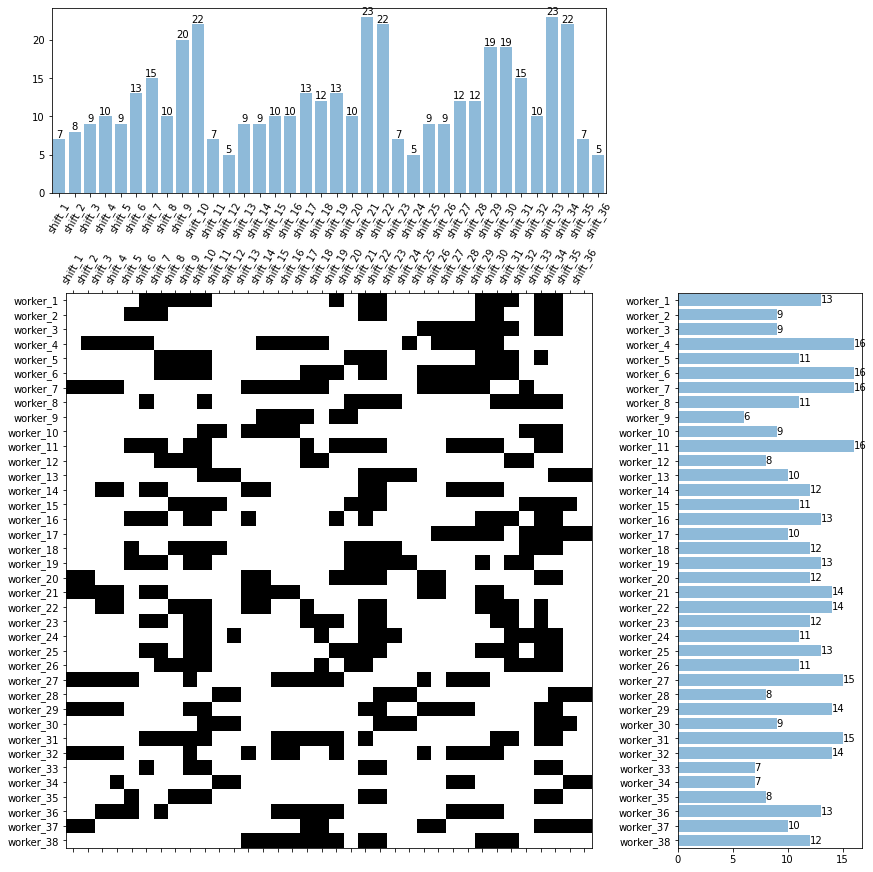

In [28]:
fig = plt.figure(figsize=(12,12), constrained_layout=True)
gs = GridSpec(4, 4, figure=fig)

ax4 = fig.add_subplot(gs[1:, 0:-1])
ax4.spy(aa)
ax4.set_xticks(range(amount_shifts), [f"shift_{i}" for i in range(1, amount_shifts + 1)], rotation=60)
ax4.set_yticks(range(amount_workers), [f"worker_{i}" for i in range(1, amount_workers + 1)]);

ax2 = fig.add_subplot(gs[0,:3], sharex=ax4)
ax2.bar(np.arange(amount_shifts),aa.sum(axis=0), alpha=0.5)
ax2.bar_label(ax2.containers[0], label_type='edge');
ax2.set_xticks(range(amount_shifts), [f"shift_{i}" for i in range(1, amount_shifts + 1)], rotation=60)
# ax2.get_xaxis().set_visible(False)

ax3 = fig.add_subplot(gs[1:, -1], sharey=ax4)
ax3.barh(np.arange(amount_workers),aa.sum(axis=1), alpha=0.5)
ax3.bar_label(ax3.containers[0], label_type='edge');
ax3.set_yticks(range(amount_workers), [f"worker_{i}" for i in range(1, amount_workers + 1)]);

In [15]:
initial_morphology = np.ones((3,3))

def add_one(input_mat):
    input_mat[0,0] += 1
    return  input_mat

def add_100(input_mat):
    input_mat[2,2] += 100
    return input_mat

In [16]:
for i in range(10):
    print(f"\ni = {i}")
    if np.random.rand() < 0.5:
        print("add one")
        initial_morphology = add_one(initial_morphology)
    else:
        print("add 100")
        initial_morphology = add_100(initial_morphology)
    print(f"mat = {initial_morphology}")


i = 0
add 100
mat = [[  1.   1.   1.]
 [  1.   1.   1.]
 [  1.   1. 101.]]

i = 1
add one
mat = [[  2.   1.   1.]
 [  1.   1.   1.]
 [  1.   1. 101.]]

i = 2
add one
mat = [[  3.   1.   1.]
 [  1.   1.   1.]
 [  1.   1. 101.]]

i = 3
add one
mat = [[  4.   1.   1.]
 [  1.   1.   1.]
 [  1.   1. 101.]]

i = 4
add 100
mat = [[  4.   1.   1.]
 [  1.   1.   1.]
 [  1.   1. 201.]]

i = 5
add 100
mat = [[  4.   1.   1.]
 [  1.   1.   1.]
 [  1.   1. 301.]]

i = 6
add one
mat = [[  5.   1.   1.]
 [  1.   1.   1.]
 [  1.   1. 301.]]

i = 7
add one
mat = [[  6.   1.   1.]
 [  1.   1.   1.]
 [  1.   1. 301.]]

i = 8
add 100
mat = [[  6.   1.   1.]
 [  1.   1.   1.]
 [  1.   1. 401.]]

i = 9
add 100
mat = [[  6.   1.   1.]
 [  1.   1.   1.]
 [  1.   1. 501.]]


In [17]:
initial_morphology

array([[  6.,   1.,   1.],
       [  1.,   1.,   1.],
       [  1.,   1., 501.]])

In [14]:
must_have_break_1 = [4,5,6,7]
must_have_break_2 = [16,17,18,19]
must_have_break_3 = [28,29,30,31]
must_have_break = [must_have_break_1, must_have_break_2, must_have_break_3]

day_1 = [0, 11] # 0 and 11 included
day_2 = [12, 23] # 12 and 23 included
day_3 = [24, 35]
days = [day_1, day_2, day_3]

In [80]:
np.where(np.array([1,2,4,5,6])>5)[0][0]

4

In [69]:
must_eat_shift[4:8]

[16, 17, 18, 19]

In [73]:
best_mat[0]

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1.,
       0., 0.])

In [87]:
for a,b in enumerate([11,22,33,44]):
    print(a,b)

0 11
1 22
2 33
3 44


In [102]:
set_of_candidate_spots = []
for worker_i in range(amount_workers):
    print("\n WORKER" , worker_i + 1)
    for descans in must_have_break:
        if best_mat[worker_i,descans].sum() > len(must_have_break_1) - 1:
            for break_shift in descans:
                set_of_candidate_spots.append((worker_i, break_shift))
            print("Dinar ",worker_i,descans)
            print("Dinar ",set_of_candidate_spots)
            
    for day in days:
        today_shifts = best_mat[worker_i, day[0]:day[1]+1]
        if (today_shifts.sum() < 1.5) and (today_shifts.sum() > 0.5): # (<--> != 1)
            set_of_candidate_spots.append((worker_i, day[0] + np.where(today_shifts > 0.5)[0][0]))
            print("Dia ",day,worker_i, today_shifts)
            print("Dia ",set_of_candidate_spots)


 WORKER 1

 WORKER 2
Dia  [12, 23] 1 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Dia  [(1, 20)]

 WORKER 3
Dia  [12, 23] 2 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Dia  [(1, 20), (2, 22)]

 WORKER 4

 WORKER 5
Dinar  4 [28, 29, 30, 31]
Dinar  [(1, 20), (2, 22), (4, 28), (4, 29), (4, 30), (4, 31)]

 WORKER 6
Dinar  5 [16, 17, 18, 19]
Dinar  [(1, 20), (2, 22), (4, 28), (4, 29), (4, 30), (4, 31), (5, 16), (5, 17), (5, 18), (5, 19)]

 WORKER 7

 WORKER 8
Dia  [0, 11] 7 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Dia  [(1, 20), (2, 22), (4, 28), (4, 29), (4, 30), (4, 31), (5, 16), (5, 17), (5, 18), (5, 19), (7, 9)]
Dia  [12, 23] 7 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Dia  [(1, 20), (2, 22), (4, 28), (4, 29), (4, 30), (4, 31), (5, 16), (5, 17), (5, 18), (5, 19), (7, 9), (7, 21)]

 WORKER 9

 WORKER 10

 WORKER 11
Dinar  10 [4, 5, 6, 7]
Dinar  [(1, 20), (2, 22), (4, 28), (4, 29), (4, 30), (4, 31), (5, 16), (5, 17), (5, 18), (5, 19), (7, 9), (7, 21), (10, 4), (10, 5), (10, 6), (10, 7)]
Dinar  10 [28, 29, 3

In [103]:
workers_with_free_shifts = np.where(total_availability - current_occupation > 0.5)[0]
workers_with_free_shifts

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37], dtype=int64)

In [104]:
workers_that_work_less = np.where(current_occupation < np.mean(current_occupation))[0]
workers_that_work_less

array([ 1,  2,  4,  7,  9, 11, 12, 14, 16, 17, 18, 23, 25, 27, 29, 32, 33,
       34, 36], dtype=int64)

In [106]:
candidate_workers = list(set(workers_with_free_shifts).intersection(workers_that_work_less))
candidate_workers

[1, 2, 4, 7, 9, 11, 12, 14, 16, 17, 18, 23, 25, 27, 29, 32, 33, 34, 36]

In [107]:
current_occupation = best_mat.sum(axis=1)

potential_candidates_for_each_spot = []

for candidate_spot in set_of_candidate_spots:
    worker_i, shift_i = candidate_spot
    local_candidates_of_spot = []
    
    for candidate_i in candidate_workers:
        if (best_mat[candidate_i, shift_i] < 0.5) and candidate_i != worker_i:
            local_candidates_of_spot.append(candidate_i)
    potential_candidates_for_each_spot.append(local_candidates_of_spot)
            
            
            
    

In [108]:
potential_candidates_for_each_spot

[[2, 7, 9, 11, 16, 27, 29, 33, 36],
 [1, 4, 7, 9, 11, 12, 16, 17, 23, 25, 27, 32, 33, 34, 36],
 [7, 9, 11, 12, 14, 17, 23, 25, 27, 29, 32, 33, 34, 36],
 [7, 9, 11, 12, 14, 17, 18, 23, 25, 27, 29, 32, 33, 34, 36],
 [1, 2, 7, 9, 12, 14, 16, 17, 23, 25, 27, 29, 32, 33, 34, 36],
 [2, 9, 12, 14, 16, 18, 23, 25, 27, 29, 32, 33, 34, 36],
 [1, 2, 4, 7, 9, 12, 14, 16, 17, 18, 23, 25, 27, 29, 32, 33, 34],
 [1, 2, 4, 7, 9, 12, 14, 16, 17, 18, 23, 25, 27, 29, 32, 33, 34],
 [1, 2, 4, 7, 9, 11, 12, 14, 16, 17, 18, 23, 25, 27, 29, 32, 33, 34, 36],
 [1, 2, 4, 7, 9, 11, 12, 16, 23, 25, 27, 29, 32, 33, 34, 36],
 [1, 2, 12, 16, 18, 27, 33, 36],
 [1, 2, 9, 11, 16, 25, 33, 36],
 [2, 4, 7, 9, 11, 12, 14, 16, 17, 23, 25, 27, 29, 32, 33, 34, 36],
 [2, 4, 7, 9, 11, 12, 14, 16, 17, 23, 25, 27, 29, 32, 33, 34, 36],
 [2, 7, 9, 12, 14, 16, 17, 23, 25, 27, 29, 32, 33, 34, 36],
 [1, 2, 4, 7, 9, 11, 12, 14, 16, 18, 23, 27, 29, 32, 33, 36],
 [7, 9, 11, 12, 14, 17, 23, 25, 27, 29, 32, 33, 34, 36],
 [7, 9, 11, 12, 14, 1

In [15]:
max(stats, key=stats.get)

'b'

In [16]:
stats.get

<function dict.get(key, default=None, /)>

In [17]:
worker_1 = np.random.randint(amount_workers)
worker_2 = np.random.randint(amount_workers)
while worker_2 == worker_1:
    worker_2 = np.random.randint(amount_workers)


In [18]:
print(worker_1,worker_2)

3 16


In [19]:
np.where(best_mat[worker_1] > 2)[0]

array([], dtype=int64)

In [22]:
np.where(best_mat[worker_2] > 0.5)[0]

array([ 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 28, 29, 30, 32, 34],
      dtype=int64)

In [23]:
set(np.where(best_mat[worker_1] > 0.5)[0]).intersection(set(np.where(best_mat[worker_2] > 0.5)[0]))

{9, 14, 15, 16, 17, 18, 20, 29, 30, 32}

In [24]:
aa = set(np.where(best_mat[worker_1] > 0.5)[0]).intersection(np.where(best_mat[worker_2] > 0.5)[0])

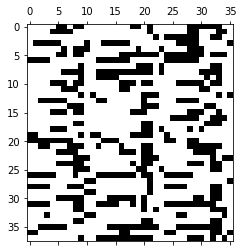

In [99]:
plt.spy(best_mat)

In [25]:
aa

{9, 14, 15, 16, 17, 18, 20, 29, 30, 32}

In [26]:
import random

In [27]:
random.sample(list(aa),2)

[20, 30]

In [28]:
a = [1,2,3,4,5,6,7,8,9]
b = [1,2,3,4,5,6,7,8]
c = set(a).difference(b)

In [55]:
a = ["a","b","c"]

In [54]:
candidate_spots_to_be_replaced = [("w1","s3"),("w1","s1"),("w5","s10")]

In [90]:
arr = np.arange(10)
np.random.shuffle(arr)
arr

array([4, 2, 6, 0, 1, 7, 5, 8, 9, 3])

In [97]:
np.random.choice(arr)

5

In [89]:
for i in arr:
    print(f"i={i}")
    if i > 8:
        print("breaking")
        break
print("end")

i=2
i=4
i=8
i=6
i=0
i=1
i=3
i=9
breaking
end


In [34]:
import itertools

In [52]:
kk = list(itertools.combinations(a, 2))
kk

[(('w1', 's3'), ('w1', 's1')),
 (('w1', 's3'), ('w5', 's10')),
 (('w1', 's1'), ('w5', 's10'))]

In [ ]:
availability_matrix.sum(axis=1) - best_mat.sum(axis=1)

In [47]:
# Let workers exchange shifts
currently_worked_by_w1 = []
currently_worked_by_w2 = []

workers_with_free_shifts = list(np.where(availability_matrix.sum(axis=1) - best_mat.sum(axis=1) > 0)[0])
# unchecked_combinations = list(itertools.combinations(workers_with_free_shifts, 2))

In [ ]:
while len(unchecked_combinations) > 0 and ((len(currently_worked_by_w1) == 0) or (len(currently_worked_by_w2) == 0)):
    worker_1, worker_2 = random.choice(unchecked_combinations)
    unchecked_combinations.remove((worker_1, worker_2))

    # print(f"w1={worker_1}   w2={worker_2}")
    current_working_shifts_w1 = np.where(best_mat[worker_1] > 0.5)[0]
    current_working_shifts_w2 = np.where(best_mat[worker_2] > 0.5)[0]

    available_working_shifts_w1 = np.where(availability_matrix[worker_1] > 0.5)[0]
    available_working_shifts_w2 = np.where(availability_matrix[worker_2] > 0.5)[0]

    free_working_shifts_w1 = set(available_working_shifts_w1).difference(current_working_shifts_w1)
    free_working_shifts_w2 = set(available_working_shifts_w2).difference(current_working_shifts_w2)

    currently_worked_by_w1 = set(current_working_shifts_w1).intersection(free_working_shifts_w2)
    currently_worked_by_w2 = set(current_working_shifts_w2).intersection(free_working_shifts_w1)

    print(f"currently_worked_by_w1={currently_worked_by_w1} (len={len(currently_worked_by_w1)})   and     currently_worked_by_w2={currently_worked_by_w2} (len={len(currently_worked_by_w2)})")
print(f"ep: unchecked_combinations={unchecked_combinations}")
currently_worked_by_w1 = random.sample(list(currently_worked_by_w1), 1)[0]
currently_worked_by_w2 = random.sample(list(currently_worked_by_w2), 1)[0]

initial_morphology[worker_1, currently_worked_by_w1] = 0
initial_morphology[worker_1, currently_worked_by_w2] = 1

initial_morphology[worker_2, currently_worked_by_w2] = 0
initial_morphology[worker_2, currently_worked_by_w1] = 1